<a href="https://colab.research.google.com/github/gopikasingh/gopika/blob/master/ImageProcessing_DepthMapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(981, 948) (981, 954)


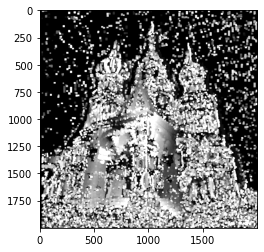

In [ ]:
# import OpenCV and pyplot
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt

# read left and right images
imgR = cv.imread('right6.jpg', 0)
imgL = cv.imread('left6.jpg', 0)

#imgR = cv.blur(imgR,(10,10))
#imgL = cv.blur(imgR,(10,10))
# creates StereoBm object
stereo = cv.StereoBM_create(numDisparities = 16, blockSize = 9)
#stereo = cv.StereoSGBM_create(minDisparity=0, numDisparities=16, blockSize=7)

print(imgR.shape, imgL.shape)

# computes disparity
imgL = cv.resize(imgL, (2000, 2000))
imgR = cv.resize(imgR, (2000, 2000))


disparity = stereo.compute(imgL, imgR)
disparity = cv.morphologyEx(disparity, cv.MORPH_OPEN, np.ones((3, 3), np.uint8))
disparity = cv.morphologyEx(disparity, cv.MORPH_DILATE, np.ones((11, 11), np.uint8))

# displays image as grayscale and plotted
plt.imshow(disparity, 'gray')
plt.show()
